## 2.1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Henrique\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2.2 - Helper functions

In [2]:
def percent_missing(df):
    missing = df.isnull().sum()
    percent_missing = missing / data.shape[0] * 100
    print(percent_missing);

    
def missing_heatmap(df):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.isnull(), cmap='coolwarm')
    plt.show();

    
def corrwith(df1, df2, column):
    df1.corrwith(df2[column]).plot.bar(
    figsize=(20,10), title=f'Level of correlation with {column}', grid=True
    );

    
def heatmap(df):
    plt.figure(figsize=(30,30))
    sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidth=1);

    
def limits(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr


def countplot(column, x_tick_rotation=False, x_rotation=90):
    print(column.value_counts())
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column)
    if x_tick_rotation:
        ax.tick_params(axis='x', rotation=x_rotation)


def how_many_outliers(df, column):
    inf_lim, sup_lim = limits(df[column])
    inf = df.loc[df[column] < inf_lim].shape[0]
    sup = df.loc[df[column] > sup_lim].shape[0]
    total = inf + sup
    return inf, sup, total
    

def remove_outliers(df, column):
    n_of_rows = df.shape[0]
    inf_lim, sup_lim = limits(df[column])
    df = df.loc[(df[column] >= inf_lim) & (df[column] <= sup_lim), :]
    removed_rows = n_of_rows - df.shape[0]
    return df, removed_rows



### Loading the Data

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(r'C:\Users\Henrique\Desktop\0Machine Learning & Deep Learning Projects for Beginners (TutsNode.net) 2023\02 - Project 1 Breast Cancer Detection/data.csv')

### Here we are going to delete the 'Unnamed: 32' column that has all null values.

In [4]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [5]:
data.shape

(569, 32)

### 'id'
- Let's eliminate the 'id' column. It will be irrelevant for our model.

In [6]:
data.drop('id', axis=1, inplace=True)
data.shape

(569, 31)

### Encoding
- Now let's convert categorical data into a numerical format that can be used by our machine learning algorithms.

B    357
M    212
Name: diagnosis, dtype: int64


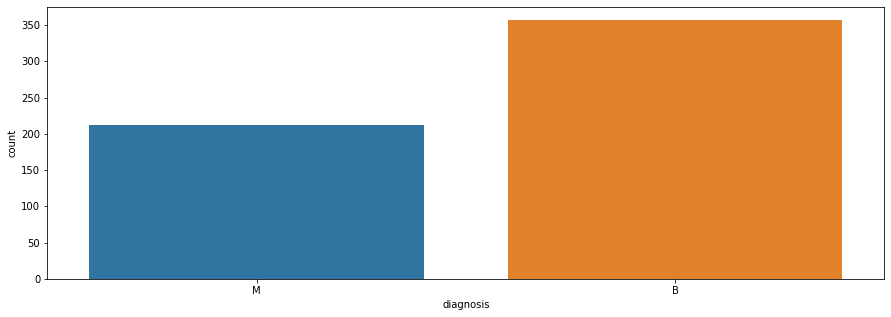

In [7]:
countplot(data['diagnosis'])

In [8]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Performing encoding with 'pd.get_dummies'

In [9]:
data = pd.get_dummies(data=data, drop_first=True)

Now our target is:

- 0 correponds to B (benign)
- 1 corresponds to M (malignant)

0    357
1    212
Name: diagnosis_M, dtype: int64


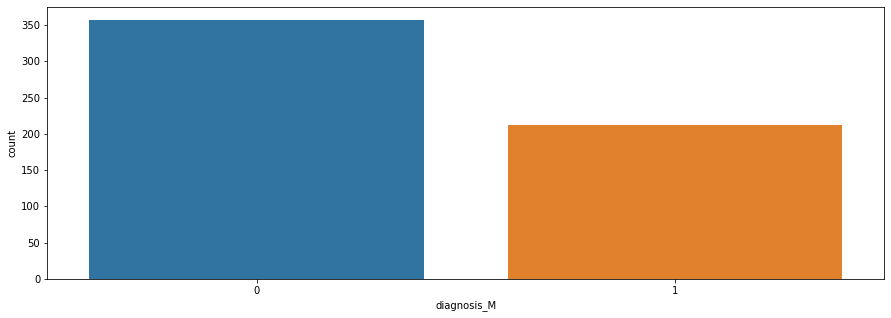

In [10]:
countplot(data['diagnosis_M'])

### Train x Test
- Splitting the data into X and y

In [11]:
X = data.drop('diagnosis_M', axis=1)
y = data['diagnosis_M']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
X_train.shape

(398, 30)

In [13]:
y_train.shape

(398,)

In [14]:
X_test.shape

(171, 30)

In [15]:
y_test.shape

(171,)

### Feature Scaling
- Let's normalize the features of our dataset so that they are on the same scale, improving the performance of the ML algorithms.

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[-0.74998027, -1.09978744, -0.74158608, ..., -0.6235968 ,
         0.07754241,  0.45062841],
       [-1.02821446, -0.1392617 , -1.02980434, ..., -0.7612376 ,
        -1.07145262, -0.29541379],
       [-0.53852228, -0.29934933, -0.56857428, ..., -0.50470441,
         0.34900827, -0.13371556],
       ...,
       [-1.3214733 , -0.20855336, -1.3143845 , ..., -0.98621857,
        -0.69108476, -0.13148524],
       [-1.24245479, -0.23244704, -1.27759928, ..., -1.7562754 ,
        -1.55125275, -1.01078909],
       [-0.74441558,  1.13188181, -0.72016173, ..., -0.28490593,
        -1.2308599 ,  0.20083251]])

In [19]:
X_test

array([[-0.21855296,  0.31710749, -0.14938447, ...,  1.36998461,
         1.0939611 ,  1.51560644],
       [-0.27141746,  1.44727832, -0.33290634, ..., -0.84095647,
        -0.70686766, -0.88310324],
       [-0.04604776, -0.84412512, -0.11098232, ..., -0.50394228,
        -1.19298094, -0.92659449],
       ...,
       [-0.13230036, -0.12253613, -0.14574637, ...,  0.20087616,
        -0.06766026,  0.36754897],
       [-0.24637638,  0.56799108, -0.28682376, ..., -0.90055508,
        -0.40225771, -0.95558866],
       [-1.35013142,  0.65639767, -1.34712739, ..., -1.36545479,
        -0.72107227, -0.54576727]])

### PCA - Principal Component Analysis
- The use of PCA (Principal Component Analysis) in this project is justified by the need to reduce the dimensionality of the data set.' With 30 initial features, applying PCA allows condensing this information into a smaller number of principal components while preserving most of the data's variance. This not only simplifies data processing and analysis but also helps to avoid multicollinearity issues, making the classification model more robust. Additionally, PCA can reveal which features are most important in discriminating between benign and malignant classes, contributing to the predictive model's effectiveness.

In [20]:
n_components=15
pca = PCA(n_components=n_components) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


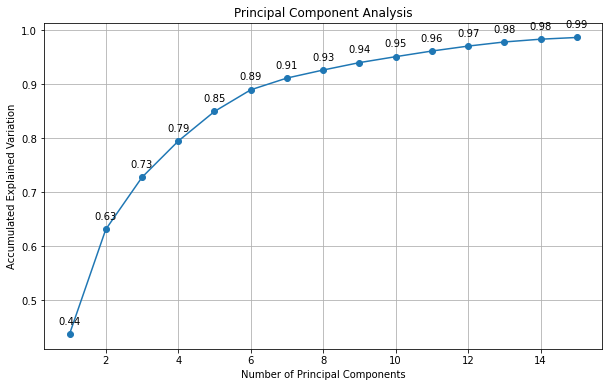

In [21]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plote a variação explicada acumulada em relação ao número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accumulated Explained Variation')
plt.title('Principal Component Analysis')
plt.grid(True)
for i, explained_var in enumerate(cumulative_explained_variance):
    plt.annotate(f'{explained_var:.2f}', (i + 1, explained_var), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

# 4. **Modeling**:

- In the "Modeling" phase of CRISP-DM, the main focus is to build machine learning models to solve the problem.
- This phase involves selecting the modeling algorithm, training, and evaluating the model.

### Model Evaluation

In [22]:
def evaluate_model(model, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metrics_dict = {
        "Model": model,
        "Accuracy Score": accuracy,
        "F1 Score": f1,
        "Precision Score": precision,
        "Recall Score": recall
    }
    
    return metrics_dict

### Model Selection

In [23]:
metrics = pd.DataFrame(columns=['Model', 'Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score'])

In [24]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_ab = AdaBoostClassifier()
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()

models = {'Logistic Regression': model_lr,
         'Random Forest': model_rf,
          'AdaBoost': model_ab,
          'KNN': model_knn,
          'Naive Bayes':model_nb
         }

for model_name, model in models.items():
    # Get the actual model from the dictionary
    ml_model = models[model_name]
    
    ml_model.fit(X_train, y_train)
    y_pred = ml_model.predict(X_test)
    
    # Calculate metrics
    metrics_dict = evaluate_model(model_name, y_test, y_pred)
    
    # Add results to DataFrame
    metrics = pd.concat([metrics, pd.DataFrame([metrics_dict])], ignore_index=True)

Let's arrange them in descending order by R² Score.

In [25]:
metrics.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.976608,0.967742,0.983607,0.952381
1,Random Forest,0.97076,0.96124,0.939394,0.984127
2,AdaBoost,0.964912,0.953125,0.938462,0.968254
3,KNN,0.959064,0.942149,0.982759,0.904762
4,Naive Bayes,0.912281,0.883721,0.863636,0.904762


# 5. **Evaluation**:

- In the "Evaluation" phase of CRISP-DM, the goal is to assess the performance of the model built in the previous phase.
- This involves model validation using appropriate metrics, interpreting the results, and verifying if the model meets the established success criteria.

- Let's check our models before the parameter tuning.

### Hyperparameter tuning

#### Logistic Regression

In [26]:
def logistic_regressor_tuning(X, y):
    # Kfold
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    penalty = ['l1', 'l2', 'elasticnet', None]
    tol = np.array([0.00001, 0.0001, 0.001, 0.01, 0,1])
    C = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
    solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    max_iter = np.array([90, 100, 110])
    warm_start = [True, False]
    param_grid = {'penalty':penalty, 'tol':tol, 'C':C, 'solver':solver, 'max_iter':max_iter, 'warm_start':warm_start}
    
    # ML Model
    logistic = LogisticRegression()
    
    # GridSearchCV
    grid_logistic = GridSearchCV(logistic, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_logistic.fit(X, y)
    
    # Predictions
    y_pred = grid_logistic.predict(X)
    
    # Metrics calculation
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    confusion = confusion_matrix(y, y_pred)
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_logistic.best_score_}')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision Score: {precision}')
    print(f'Recall Score: {recall}')
    print(f'Best estimators: {grid_logistic.best_estimator_}')
    print(f'Confusion Matrix: \n{confusion}')

In [27]:
logistic_regressor_tuning(X_train, y_train)

BEST RESULTS:
Best score: 0.9875
Accuracy: 0.9899497487437185
F1 Score: 0.9863945578231292
Precision Score: 1.0
Recall Score: 0.9731543624161074
Best estimators: LogisticRegression(C=0.8, max_iter=90, tol=1e-05, warm_start=True)
Confusion Matrix: 
[[249   0]
 [  4 145]]


C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15600 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    rai

# 6. **Deploy**:

- In the "Deploy" phase of CRISP-DM, the focus is on presenting the results of the Data Science project and preparing for the implementation of the model in a production environment.
- This phase can involve creating reports, visualizations, and documenting the project.
- I will import the necessary libraries again (in case the deployment file is opened in a separate file).

# Está FUNCIONANDO
# Vamos testar algumas amostras

In [28]:
benigno="13.540	14.36	87.46	566.3	0.09779	0.08129	0.066640	0.047810	0.1885	0.05766	0.2699	0.7886	2.058	23.560	0.008462	0.014600	0.023870	0.013150	0.01980	0.002300	15.110	19.26	99.70	711.2	0.14400	0.17730	0.239000	0.12880	0.2977	0.07259"

In [29]:
maligno='12.450	15.70	82.57	477.1	0.12780	0.17000	0.157800	0.080890	0.2087	0.07613	0.3345	0.8902	2.217	27.190	0.007510	0.033450	0.036720	0.011370	0.02165	0.005082	15.470	23.75	103.40	741.6	0.17910	0.52490	0.535500	0.17410	0.3985	0.12440'

In [30]:
benigno63='9.173	13.86	59.20	260.9	0.07721	0.08751	0.059880	0.021800	0.2341	0.06963	0.4098	2.2650	2.608	23.520	0.008738	0.039380	0.043120	0.015600	0.04192	0.005822	10.010	19.23	65.59	310.1	0.09836	0.16780	0.139700	0.05087	0.3282	0.08490	'

In [31]:
maligno62='14.250	22.15	96.42	645.7	0.10490	0.20080	0.213500	0.086530	0.1949	0.07292	0.7036	1.2680	5.373	60.780	0.009407	0.070560	0.068990	0.018480	0.01700	0.006113	17.670	29.51	119.10	959.5	0.16400	0.62470	0.692200	0.17850	0.2844	0.11320	'

In [32]:
def substituir_tab_por_virgula(dados):
    dados_formatados = dados.replace('\t', ',')
    return dados_formatados

In [44]:
dados_formatados = substituir_tab_por_virgula(maligno62)
print(dados_formatados)


14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,0.07292,0.7036,1.2680,5.373,60.780,0.009407,0.070560,0.068990,0.018480,0.01700,0.006113,17.670,29.51,119.10,959.5,0.16400,0.62470,0.692200,0.17850,0.2844,0.11320,


In [45]:
data = np.array([[14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,0.07292,0.7036,1.2680,5.373,60.780,0.009407,0.070560,0.068990,0.018480,0.01700,0.006113,17.670,29.51,119.10,959.5,0.16400,0.62470,0.692200,0.17850,0.2844,0.11320]])

In [46]:
# Crie um modelo de LogisticRegression fictício (substitua pelo seu modelo real)
model = LogisticRegression(C=1.75, random_state=0, solver='sag')

# Treine o modelo (substitua pelo treinamento do seu modelo real)
model.fit(X_train, y_train)

# Crie uma instância do StandardScaler
#scaler = StandardScaler()

# Ajuste o scaler aos seus dados de treinamento
#scaler.fit(X_train)

# Aplique o scaler aos dados de entrada do usuário
#data_scaled = scaler.transform(data)

# Faça a predição
prediction = model.predict(scaler.transform(data))

if prediction[0] == 1:
    resultado_predicao = "Predição: 1 (Maligno)"
else:
    resultado_predicao = "Predição: 0 (Benigno)"

# Imprima o resultado da predição
print(resultado_predicao)




Predição: 1 (Maligno)


C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [86]:
#data.head(50)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.398,74.080,0.005225,0.013080,0.018600,0.013400,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.18600,0.2750,0.08902,1
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.445,27.230,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.25750,0.6638,0.17300,1
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.217,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.17410,0.3985,0.12440,1
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.180,53.910,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.19320,0.3063,0.08368,1
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.856,50.960,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.15560,0.3196,0.11510,1
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.406,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.20600,0.4378,0.10720,1
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.22100,0.4366,0.20750,1
10,16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,0.05697,0.3795,1.1870,2.466,40.510,0.004029,0.009269,0.011010,0.007591,0.01460,0.003042,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.145900,0.09975,0.2948,0.08452,1
11,15.780,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.066060,0.1842,0.06082,0.5058,0.9849,3.564,54.160,0.005771,0.040610,0.027910,0.012820,0.02008,0.004144,20.420,27.28,136.50,1299.0,0.13960,0.56090,0.396500,0.18100,0.3792,0.10480,1
13,15.850,23.95,103.70,782.7,0.08401,0.10020,0.099380,0.053640,0.1847,0.05338,0.4033,1.0780,2.903,36.580,0.009769,0.031260,0.050510,0.019920,0.02981,0.003002,16.840,27.66,112.00,876.5,0.11310,0.19240,0.232200,0.11190,0.2809,0.06287,1


# TESTE - FUNCIONA!

In [48]:
import tkinter as tk
from sklearn.linear_model import LogisticRegression
import numpy as np

# Função para fazer a predição com LogisticRegression
def breast_cancer_predict():
    # Coleta os dados dos campos
    try:
        radius_m = float(radius_mean.get())
        texture_m = float(texture_mean.get())
        perimeter_m = float(perimeter_mean.get())
        area_m = float(area_mean.get())
        smoothness_m = float(smoothness_mean.get())
        compactness_m = float(compactness_mean.get())
        concavity_m = float(concavity_mean.get())
        concave_points_m = float(concave_points_mean.get())
        symmetry_m = float(symmetry_mean.get())
        fractal_dimension_m = float(fractal_dimension_mean.get())
        radius_s = float(radius_se.get())
        texture_s = float(texture_se.get())
        perimeter_s = float(perimeter_se.get())
        area_s = float(area_se.get())
        smoothness_s = float(smoothness_se.get())
        compactness_s = float(compactness_se.get())
        concavity_s = float(concavity_se.get())
        concave_points_s = float(concave_points_se.get())
        symmetry_s = float(symmetry_se.get())
        fractal_dimension_s = float(fractal_dimension_se.get())
        radius_w = float(radius_worst.get())
        texture_w = float(texture_worst.get())
        perimeter_w = float(perimeter_worst.get())
        area_w = float(area_worst.get())
        smoothness_w = float(smoothness_worst.get())
        compactness_w = float(compactness_worst.get())
        concavity_w = float(concavity_worst.get())
        concave_points_w = float(concave_points_worst.get())
        symmetry_w = float(symmetry_worst.get())
        fractal_dimension_w = float(fractal_dimension_worst.get())      

        # Crie um array numpy com os dados para a predição
        data = np.array([[radius_m, texture_m, perimeter_m, area_m, smoothness_m, compactness_m, concavity_m, 
                          concave_points_m, symmetry_m, fractal_dimension_m, radius_s, texture_s, perimeter_s, area_s,
                          smoothness_s, compactness_s, concavity_s, concave_points_s, symmetry_s, fractal_dimension_s, radius_w, texture_w,
                          perimeter_w, area_w, smoothness_w, compactness_w, concavity_w, concave_points_w, symmetry_w, fractal_dimension_w]])

        # Crie um modelo de LogisticRegression fictício (substitua pelo seu modelo real)
        model = LogisticRegression(C=1.75, random_state=0, solver='sag')

        # Treine o modelo (substitua pelo treinamento do seu modelo real)
        model.fit(X_train, y_train)

        # Crie uma instância do StandardScaler
        #scaler = StandardScaler()

        # Ajuste o scaler aos seus dados de treinamento
        #scaler.fit(X_train)

        # Aplique o scaler aos dados de entrada do usuário
        #data_scaled = scaler.transform(data)

        # Faça a predição
        prediction = model.predict(scaler.transform(data))

        # Traduza a predição em 'malignant' ou 'benign'
        if prediction[0] == 1:
            result_text = 'Malignant'
            result_bg_color = 'red'
        else:
            result_text = 'Benign'
            result_bg_color = 'green'

        # Atualize o texto do label_button com o resultado da predição
        font_style_predict = ("Arial", 14)
        label_button.config(text=f'{result_text}', relief='solid', font=font_style_predict, fg='white')
        label_button.configure(bg=result_bg_color)

    except ValueError:
        # Tratamento de erro para campos vazios ou não numéricos
        label_button.config(text='Error: Fill in all fields with numerical values', relief='solid', bg='red')
        
        
program = tk.Tk()

program.title('Breast Cancer Diagnostic')

# Main label
font_style = ("Arial", 20)
label_main = tk.Label(text='PYHTON CANCER INSTITUTE\nBreast Cancer Diagnostic System', borderwidth=1, relief='solid', font=font_style, bg='#658bd2', fg='white')
label_main.grid(row=0, column=0, padx=10, pady=10,sticky='nswe', columnspan=10)

# Columns - first row
label_radius_mean = tk.Label(text='radius_mean')
label_radius_mean.grid(row=1, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
radius_mean = tk.Entry()
radius_mean.grid(row=1, column=1)

label_texture_mean = tk.Label(text='texture_mean')
label_texture_mean.grid(row=1, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
texture_mean = tk.Entry()
texture_mean.grid(row=1, column=3)

label_perimeter_mean = tk.Label(text='perimeter_mean')
label_perimeter_mean.grid(row=1, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
perimeter_mean = tk.Entry()
perimeter_mean.grid(row=1, column=5)

label_area_mean = tk.Label(text='area_mean')
label_area_mean.grid(row=1, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
area_mean = tk.Entry()
area_mean.grid(row=1, column=7)

label_smoothness_mean = tk.Label(text='smoothness_mean')
label_smoothness_mean.grid(row=1, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
smoothness_mean = tk.Entry()
smoothness_mean.grid(row=1, column=9)


# Columns - second row
label_compactness_mean = tk.Label(text='compactness_mean')
label_compactness_mean.grid(row=2, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
compactness_mean = tk.Entry()
compactness_mean.grid(row=2, column=1)

label_concavity_mean = tk.Label(text='concavity_mean')
label_concavity_mean.grid(row=2, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
concavity_mean = tk.Entry()
concavity_mean.grid(row=2, column=3)

label_concave_points_mean = tk.Label(text='concave points_mean')
label_concave_points_mean.grid(row=2, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
concave_points_mean = tk.Entry()
concave_points_mean.grid(row=2, column=5)

label_symmetry_mean = tk.Label(text='symmetry_mean')
label_symmetry_mean.grid(row=2, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
symmetry_mean = tk.Entry()
symmetry_mean.grid(row=2, column=7)

label_fractal_dimension_mean = tk.Label(text='fractal_dimension_mean')
label_fractal_dimension_mean.grid(row=2, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
fractal_dimension_mean = tk.Entry()
fractal_dimension_mean.grid(row=2, column=9)


# Columns - third row
label_radius_se = tk.Label(text='radius_se')
label_radius_se.grid(row=3, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
radius_se = tk.Entry()
radius_se.grid(row=3, column=1)

label_texture_se = tk.Label(text='texture_se')
label_texture_se.grid(row=3, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
texture_se = tk.Entry()
texture_se.grid(row=3, column=3)

label_perimeter_se = tk.Label(text='perimeter_se')
label_perimeter_se.grid(row=3, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
perimeter_se = tk.Entry()
perimeter_se.grid(row=3, column=5)

label_area_se = tk.Label(text='area_se')
label_area_se.grid(row=3, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
area_se = tk.Entry()
area_se.grid(row=3, column=7)

label_smoothness_se = tk.Label(text='smoothness_se')
label_smoothness_se.grid(row=3, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
smoothness_se = tk.Entry()
smoothness_se.grid(row=3, column=9)


# Columns - fourth row
label_compactness_se = tk.Label(text='compactness_se')
label_compactness_se.grid(row=4, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
compactness_se = tk.Entry()
compactness_se.grid(row=4, column=1)

label_concavity_se = tk.Label(text='concavity_se')
label_concavity_se.grid(row=4, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
concavity_se = tk.Entry()
concavity_se.grid(row=4, column=3)

label_concave_points_se = tk.Label(text='concave points_se')
label_concave_points_se.grid(row=4, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
concave_points_se = tk.Entry()
concave_points_se.grid(row=4, column=5)

label_symmetry_se = tk.Label(text='symmetry_se')
label_symmetry_se.grid(row=4, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
symmetry_se = tk.Entry()
symmetry_se.grid(row=4, column=7)

label_fractal_dimension_se = tk.Label(text='fractal_dimension_se')
label_fractal_dimension_se.grid(row=4, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
fractal_dimension_se = tk.Entry()
fractal_dimension_se.grid(row=4, column=9)


# Columns - fifth row
label_radius_worst = tk.Label(text='radius_worst')
label_radius_worst.grid(row=5, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
radius_worst = tk.Entry()
radius_worst.grid(row=5, column=1)

label_texture_worst = tk.Label(text='texture_worst')
label_texture_worst.grid(row=5, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
texture_worst = tk.Entry()
texture_worst.grid(row=5, column=3)

label_perimeter_worst = tk.Label(text='perimeter_worst')
label_perimeter_worst.grid(row=5, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
perimeter_worst = tk.Entry()
perimeter_worst.grid(row=5, column=5)

label_area_worst = tk.Label(text='area_worst')
label_area_worst.grid(row=5, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
area_worst = tk.Entry()
area_worst.grid(row=5, column=7)

label_smoothness_worst = tk.Label(text='smoothness_worst')
label_smoothness_worst.grid(row=5, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
smoothness_worst = tk.Entry()
smoothness_worst.grid(row=5, column=9)


# Columns - sixth row
label_compactness_worst = tk.Label(text='compactness_worst')
label_compactness_worst.grid(row=6, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
compactness_worst = tk.Entry()
compactness_worst.grid(row=6, column=1)

label_concavity_worst = tk.Label(text='concavity_worst')
label_concavity_worst.grid(row=6, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
concavity_worst = tk.Entry()
concavity_worst.grid(row=6, column=3)

label_concave_points_worst = tk.Label(text='concave points_worst')
label_concave_points_worst.grid(row=6, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
concave_points_worst = tk.Entry()
concave_points_worst.grid(row=6, column=5)

label_symmetry_worst = tk.Label(text='symmetry_worst')
label_symmetry_worst.grid(row=6, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
symmetry_worst = tk.Entry()
symmetry_worst.grid(row=6, column=7)

label_fractal_dimension_worst = tk.Label(text='fractal_dimension_worst')
label_fractal_dimension_worst.grid(row=6, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
fractal_dimension_worst = tk.Entry()
fractal_dimension_worst.grid(row=6, column=9)

# Button
font_style_button = ("Arial", 14)
button_predict = tk.Button(text='Perform analysis', command=breast_cancer_predict, bg='#658bd2', font=font_style_button, fg='white')
button_predict.grid(row=7, column=3, padx=10, pady=10, sticky='nswe', columnspan=2)

# Show result
label_button = tk.Label(text='Result: N/A', borderwidth=1, relief='solid', font=font_style_button)
label_button.grid(row=7, column=5, padx=10, pady=10, sticky='nswe', columnspan=2)

program.mainloop()


C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
